___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Load Dataset

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

#### Explore Data

You can rename columns to more usable, if you need.

In [5]:
df.rename(columns = {"Annual Income (k$)" : "Income", "Spending Score (1-100)" : "Spending Score"}, inplace = True)

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





<Figure size 864x432 with 0 Axes>

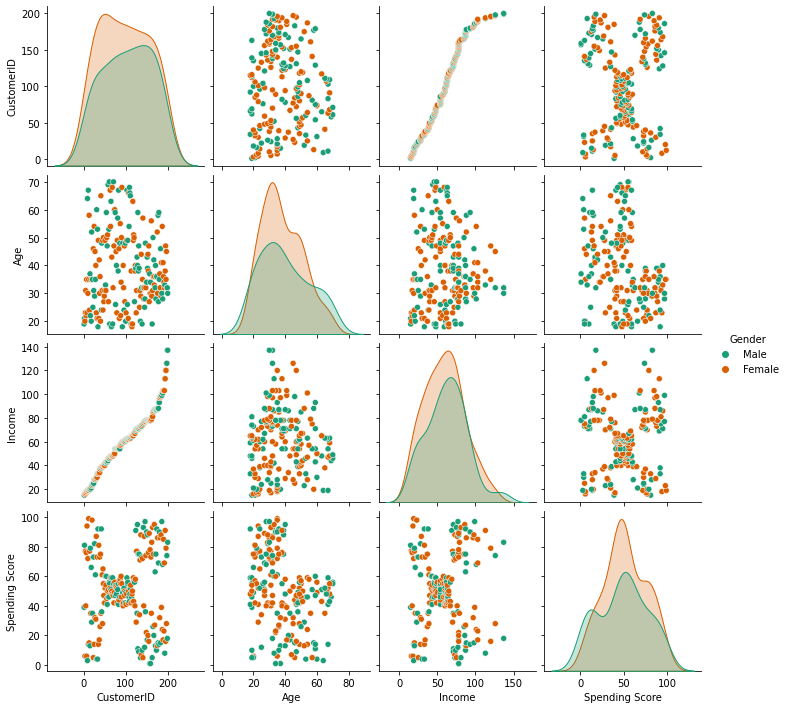

In [6]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='Gender',palette='Dark2');

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [7]:
age_score = df[["Age", "Spending Score"]]

In [8]:
age_score

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#### *ii. Determine optimal number of clusters*

In [9]:
from pyclustertend import hopkins

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
scaler = StandardScaler()

In [12]:
X1 = scaler.fit_transform(age_score)

In [13]:
hopkins(X1, X1.shape[0])

0.2845029634929394

In [14]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X1)
    ssd.append(model.inertia_)

In [15]:
ssd

[189.3874903399244,
 124.33553836009898,
 89.76521676586151,
 71.2367845996211,
 53.12843835629399,
 45.937128141634496,
 39.44832903837983,
 33.935199612787066]

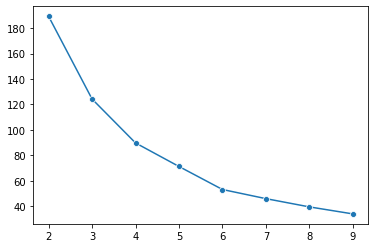

In [16]:
sns.lineplot(x=K, y = ssd, marker="o");

In [17]:
from yellowbrick.cluster import KElbowVisualizer

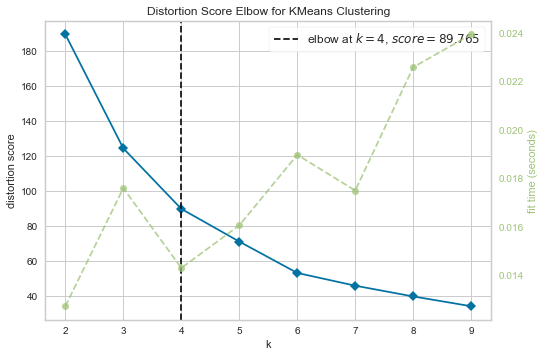

In [18]:
kmeans = KMeans(random_state=24)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X1)
visu.poof();

### Why silhouette_score is negative?

In sklearn's description of the silhouette_score method, it says that negative values stand for data points that are wrongly assigned to a cluster.

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
k_range = range(2,9)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=24)
    kmeans.fit(X1)
    kmeans.labels_
    silhouette_avg = silhouette_score(X1, kmeans.labels_)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.42369111306686563
For n_clusters=6, the silhouette score is 0.4531637132837109
For n_clusters=7, the silhouette score is 0.41177179685316956
For n_clusters=8, the silhouette score is 0.3940817496166704


#### *iii. Apply K Means*

In [21]:
kmeans = KMeans(n_clusters=4,random_state=42)

In [22]:
kmeans.fit(X1)

KMeans(n_clusters=4, random_state=42)

In [23]:
age_score["cluster_kmeans"] = kmeans.labels_

#### *iv. Visualizing and Labeling All the Clusters*

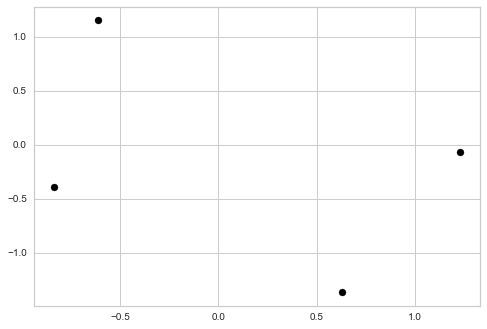

In [24]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = "black")

In [25]:
X1_df = X1.copy()

In [26]:
X1_df = pd.DataFrame(X1_df, columns = ["Age", "Spending Score"])

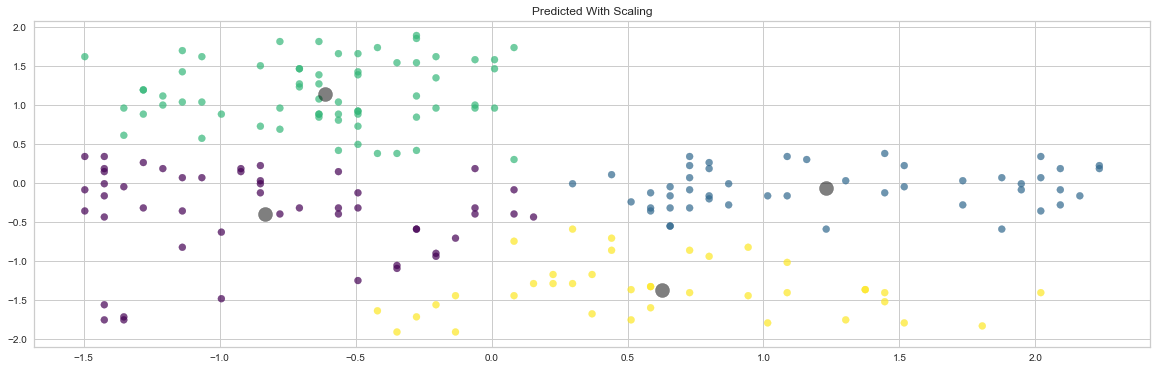

In [27]:
plt.figure(figsize = (20,6))
plt.scatter(X1_df["Age"], X1_df["Spending Score"], c= kmeans.labels_, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:,0], centers[:,1], c = "black", s=200, alpha = 0.5)
plt.title("Predicted With Scaling");

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [28]:
income_spending = df[["Income", "Spending Score"]]

In [29]:
income_spending

,Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### *ii. Determine optimal number of clusters*

In [30]:
scaler2 = StandardScaler()

In [31]:
X2 = scaler2.fit_transform(income_spending)

In [32]:
hopkins(X2, X2.shape[0])

0.3036714782679436

In [33]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X2)
    ssd.append(model.inertia_)

In [34]:
ssd

[270.70426664306717,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.067795914519614,
 44.86475569922555,
 37.199523875977086,
 32.406659676456606]

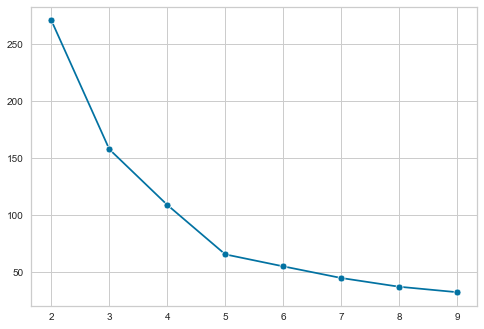

In [35]:
sns.lineplot(x=K, y = ssd, marker="o");

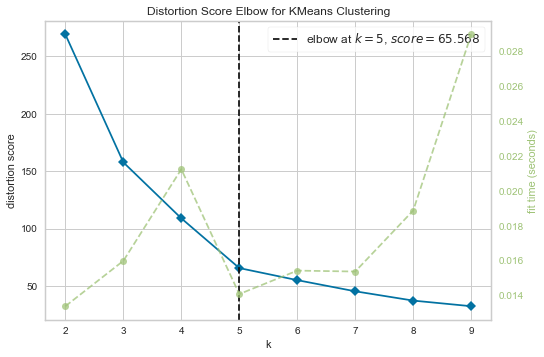

In [36]:
kmeans = KMeans(random_state=24)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X2)
visu.poof();

In [37]:
k_range = range(2,9)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=24)
    kmeans.fit(X2)
    kmeans.labels_
    silhouette_avg = silhouette_score(X2, kmeans.labels_)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.28793808282017214
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5317107324040978
For n_clusters=8, the silhouette score is 0.45235834147562665


#### *iii. Apply K Means*

In [38]:
kmeans = KMeans(n_clusters=5,random_state=42)

In [39]:
kmeans.fit(X2)

KMeans(n_clusters=5, random_state=42)

In [40]:
income_spending["cluster_kmeans"] = kmeans.labels_

#### *iv. Visualizing and Labeling All the Clusters*

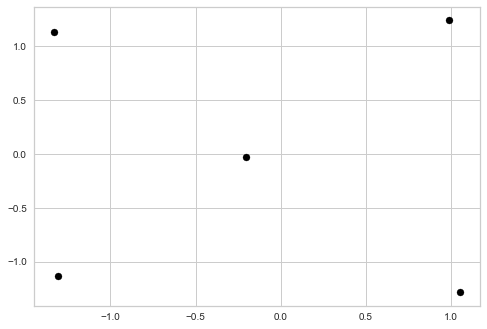

In [41]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = "black")

In [42]:
X2_df = X2.copy()

In [43]:
X2_df = pd.DataFrame(X2_df, columns = ["Income", "Spending Score"])

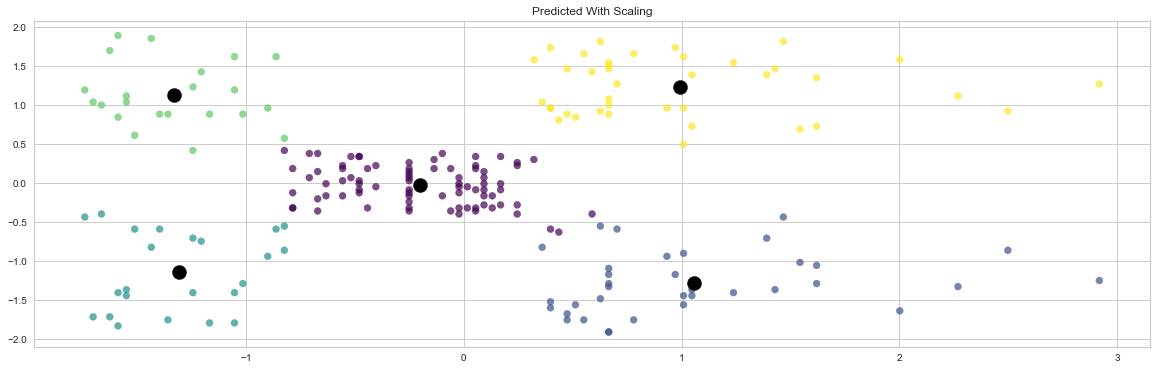

In [44]:
plt.figure(figsize = (20,6))
plt.scatter(X2_df["Income"], X2_df["Spending Score"], c= kmeans.labels_, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:,0], centers[:,1], c = "black", s=200)
plt.title("Predicted With Scaling");

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [46]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

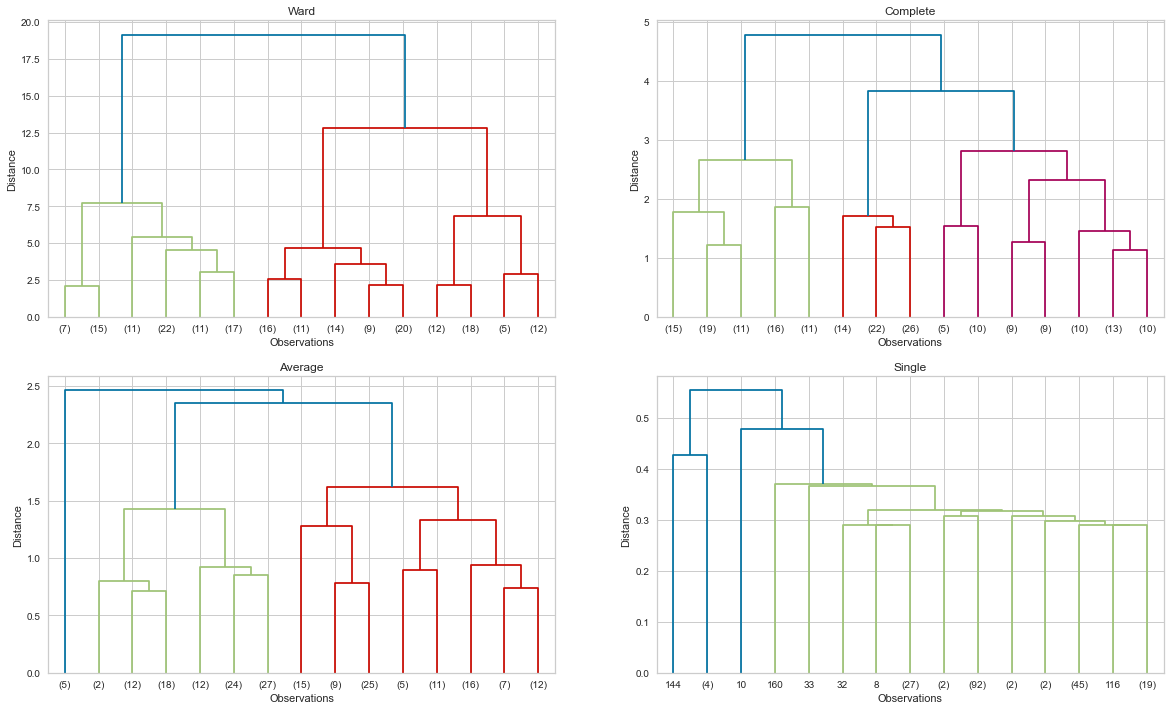

In [47]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, p=15, truncate_mode="lastp")

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, p=15, truncate_mode="lastp")

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, p=15, truncate_mode="lastp")

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, p=15, truncate_mode="lastp");

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
k_range = range(2,9)
for k in k_range:
    hier = AgglomerativeClustering(n_clusters=k, affinity = "euclidean", linkage = "ward")
    hier.fit(X1)
    hier.labels_
    silhouette_avg = silhouette_score(X1, hier.labels_)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.41449964268735984
For n_clusters=3, the silhouette score is 0.41664148520394606
For n_clusters=4, the silhouette score is 0.3892700489345869
For n_clusters=5, the silhouette score is 0.3764554127950157
For n_clusters=6, the silhouette score is 0.3990690566534328
For n_clusters=7, the silhouette score is 0.3586046783668453
For n_clusters=8, the silhouette score is 0.3610812833213386


## Clustering based on Annual Income and Spending Score- x2

In [50]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

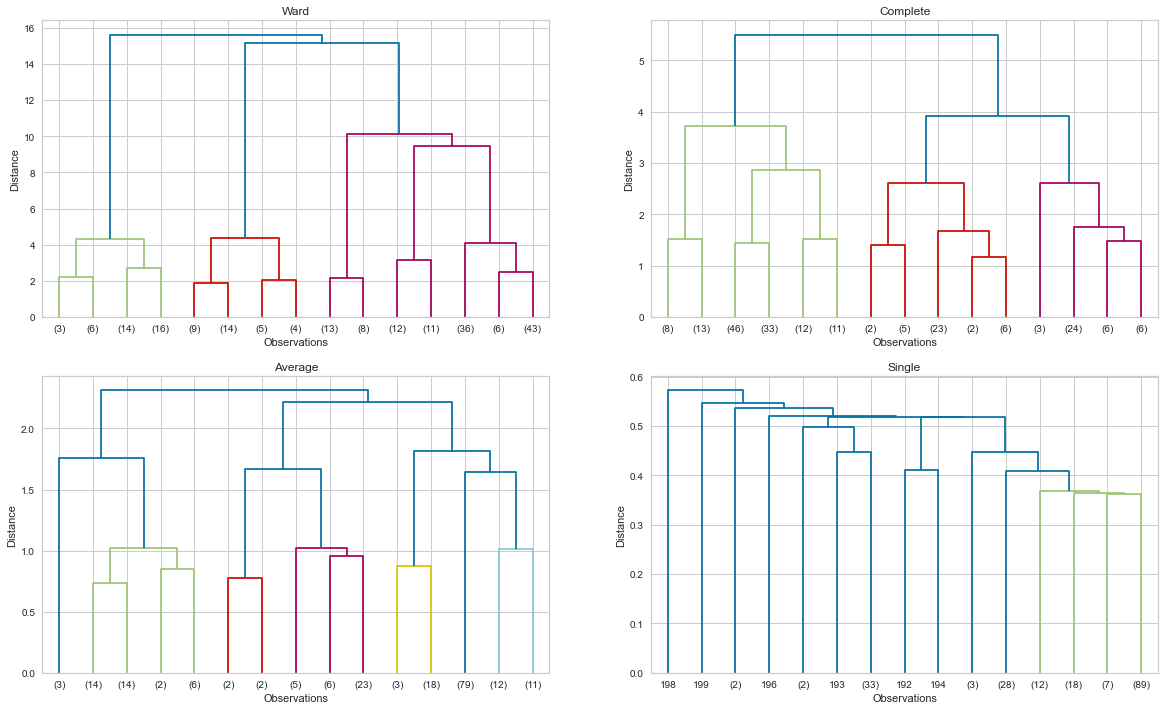

In [51]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, p=15, truncate_mode="lastp")

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, p=15, truncate_mode="lastp")

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, p=15, truncate_mode="lastp")

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, p=15, truncate_mode="lastp");

In [52]:
k_range = range(2,9)
for k in k_range:
    hier = AgglomerativeClustering(n_clusters=k, affinity = "euclidean", linkage = "ward")
    hier.fit(X2)
    hier.labels_
    silhouette_avg = silhouette_score(X2, hier.labels_)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3842337621772661
For n_clusters=3, the silhouette score is 0.4610481446570447
For n_clusters=4, the silhouette score is 0.4925507715349343
For n_clusters=5, the silhouette score is 0.5538089226688662
For n_clusters=6, the silhouette score is 0.5386761871036926
For n_clusters=7, the silhouette score is 0.5197949293475768
For n_clusters=8, the silhouette score is 0.4308617778221774


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [53]:
agg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg.fit(X1)
age_score["cluster_agg"] = agg.labels_

In [54]:
age_score

,Age,Spending Score,cluster_kmeans,cluster_agg
0,19,39,0,0
1,21,81,2,2
2,20,6,0,0
3,23,77,2,2
4,31,40,0,0
...,...,...,...,...
195,35,79,2,2
196,45,28,3,1
197,32,74,2,2
198,32,18,0,0


#### Annual Income and Spending Score- x2

In [55]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X2)
income_spending["cluster_agg"] = agg.labels_

In [56]:
income_spending

,Income,Spending Score,cluster_kmeans,cluster_agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,1
196,126,28,1,0
197,126,74,4,1
198,137,18,1,0


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

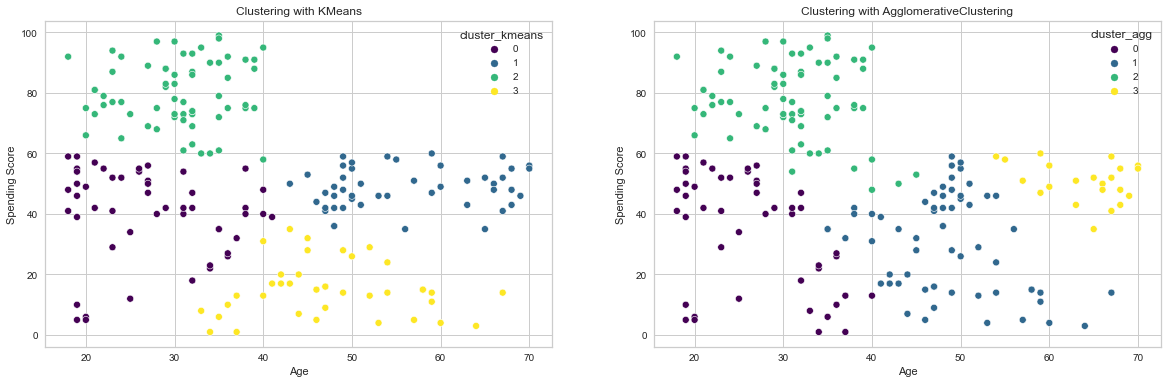

In [57]:
plt.figure(figsize = (20,6))
plt.subplot(121)
sns.scatterplot(data = age_score, x = "Age", y = "Spending Score", hue= "cluster_kmeans", palette = "viridis")
plt.title("Clustering with KMeans")
plt.subplot(122)
sns.scatterplot(data = age_score, x = "Age", y = "Spending Score", hue= "cluster_agg", palette = "viridis")

plt.title("Clustering with AgglomerativeClustering");

#### Annual Income and Spending Score- x2

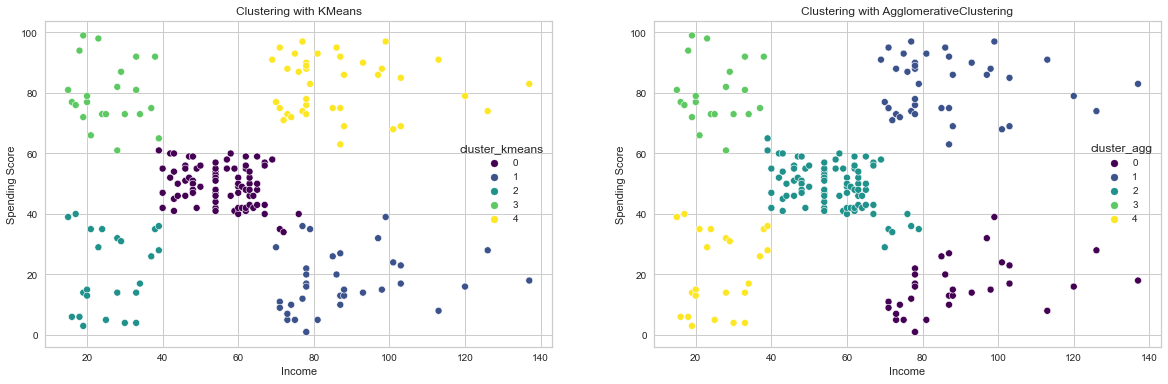

In [58]:
plt.figure(figsize = (20,6))
plt.subplot(121)
sns.scatterplot(data = income_spending, x = "Income", y = "Spending Score", hue= "cluster_kmeans", palette = "viridis")
plt.title("Clustering with KMeans")

plt.subplot(122)
sns.scatterplot(data = income_spending, x = "Income", y = "Spending Score", hue= "cluster_agg", palette = "viridis")
plt.title("Clustering with AgglomerativeClustering");

#### Interpretation based on Age and Spending Score- x1

In [63]:
age_score.head()

,Age,Spending Score,cluster_kmeans,cluster_agg
0,19,39,0,0
1,21,81,2,2
2,20,6,0,0
3,23,77,2,2
4,31,40,0,0


In [69]:
df.drop(["Age_Score_Cluster"], axis = 1, inplace = True)

In [71]:
df["Age_Spending_Cluster"] = age_score["cluster_kmeans"]

In [72]:
df.head()

,CustomerID,Gender,Age,Income,Spending Score,Income_Spending_Cluster,Age_Spending_Cluster
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,3,2
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,3,2
4,5,Female,31,17,40,2,0


In [75]:
X1_cluster_mean = df.groupby("Age_Spending_Cluster").mean()
X1_cluster_mean

,CustomerID,Age,Income,Spending Score,Income_Spending_Cluster
Age_Spending_Cluster,,,,,
0,97.120000,27.220000,59.620000,40.040000,0.460000
1,84.255319,55.978723,54.425532,48.510638,0.127660
2,109.753846,30.292308,63.830769,79.815385,3.415385
3,109.210526,47.605263,63.789474,15.000000,1.368421


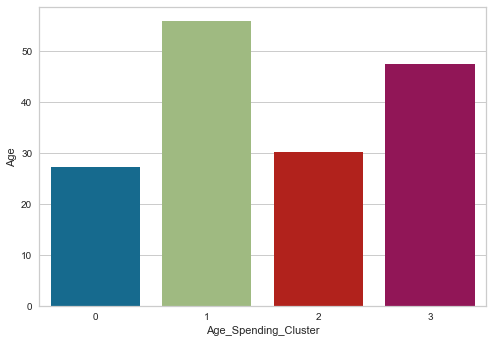

In [77]:
sns.barplot(X1_cluster_mean.index, X1_cluster_mean["Age"]);

### Conclusion

**cluster 0** : The average age is around 25, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 55, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 45.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [64]:
income_spending.head()

,Income,Spending Score,cluster_kmeans,cluster_agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


In [67]:
df["Income_Spending_Cluster"] = income_spending["cluster_kmeans"]

In [68]:
df.head()

,CustomerID,Gender,Age,Income,Spending Score,Age_Score_Cluster,Income_Spending_Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,0,2


In [80]:
X2_cluster_mean = df.groupby(["Income_Spending_Cluster", "Gender"]).mean()
X2_cluster_mean

CustomerID        Age     Income  \
Income_Spending_Cluster Gender                                     
0                       Female   86.770833  40.895833  55.354167   
                        Male     85.666667  45.363636  55.212121   
1                       Female  168.125000  43.250000  90.937500   
                        Male    161.210526  39.315789  85.894737   
2                       Female   24.714286  43.214286  27.357143   
                        Male     20.333333  48.333333  24.666667   
3                       Female   22.769231  25.461538  25.692308   
                        Male     23.555556  25.000000  25.777778   
4                       Female  163.333333  32.190476  86.047619   
                        Male    160.444444  33.277778  87.111111   

                                Spending Score  Age_Spending_Cluster  
Income_Spending_Cluster Gender                                        
0                       Female       49.000000              0.625000  
                        Male         50.272727              0.727273  
1                       Female       22.062500              1.750000  
                        Male         12.947368              2.105263  
2                       Female       21.714286              2.000000  
                        Male         19.666667              2.111111  
3                       Female       80.538462              2.000000  
                        Male         77.666667              2.000000  
4                       Female       81.666667              2.000000  
                        Male         82.666667              2.000000

In [90]:
X2_cluster_mean = X2_cluster_mean.reset_index()

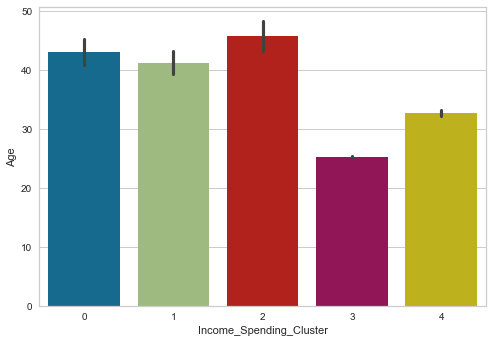

In [91]:
sns.barplot(data = X2_cluster_mean, x="Income_Spending_Cluster", y="Age");

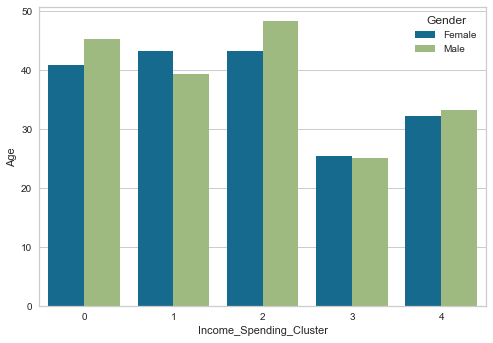

In [92]:
sns.barplot(data = X2_cluster_mean, x="Income_Spending_Cluster", y="Age", hue="Gender");

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___